### Análise exploratória de dados - Empresa de Varejo

Nesta análise exploratória, iremos analisar os dados da empresa Adventure Works a fim de obter insights que ajudem na tomada de decisões.

### Atributos

A maioria dos atributos analisando possuem o nome autoexplicativo, sendo eles:

* Data Venda
* Data Envio 
* ID Loja
* ID Produto
* ID Cliente
* No. Venda
* Custo Unitário
* Preço Unitário
* Quantidade
* Valor Desconto
* Produto
* Fabricante
* Marca : Econômica e regular. 
* Classe
* Cor'

Obs.: O atributo Valor Venda já contém o valor total de todas as quantidades

### Importando as bibliotecas


In [1]:
# Importando a biblioteca
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use("seaborn")

import warnings
warnings.filterwarnings("ignore")

### Carregando a base de dados

In [2]:
# Importando a base de dados
df = pd.read_excel("AdventureWorks.xlsx")

In [3]:
# Verificando os primeiros registros
pd.options.display.float_format = '{:20,.2f}'.format
df.head()


,Data Venda,Data Envio,ID Loja,ID Produto,ID Cliente,No. Venda,Custo Unitário,Preço Unitário,Quantidade,Valor Desconto,Produto,Fabricante,Marca,Classe,Cor
0,2008-05-09,2008-05-29,199,384,18839,200805093CS607,348.58,758.00,6,0.00,Adventure Works Laptop15.4W M1548 Red,Adventure Works,Adventure Works,Regular,Red
1,2008-05-12,2008-05-17,306,384,19051,200805123CS567,348.58,758.00,6,0.00,Adventure Works Laptop15.4W M1548 Red,Adventure Works,Adventure Works,Regular,Red
2,2008-05-14,2008-05-20,306,384,19052,200805143CS576,348.58,758.00,6,0.00,Adventure Works Laptop15.4W M1548 Red,Adventure Works,Adventure Works,Regular,Red
3,2008-05-21,2008-05-27,306,384,19052,200805213CS576,348.58,758.00,6,0.00,Adventure Works Laptop15.4W M1548 Red,Adventure Works,Adventure Works,Regular,Red
4,2008-06-20,2008-06-27,306,384,19053,200806203CS586,348.58,758.00,6,0.00,Adventure Works Laptop15.4W M1548 Red,Adventure Works,Adventure Works,Regular,Red


In [4]:
# Analisando o tamanho do conjunto de dados
print(f" O dataset apresenta {df.shape[0]} registros e {df.shape[1]} colunas ")

 O dataset apresenta 904 registros e 15 colunas 


In [5]:
# Verificando o tipo de dados
df.dtypes

Data Venda        datetime64[ns]
Data Envio        datetime64[ns]
ID Loja                    int64
ID Produto                 int64
ID Cliente                 int64
No. Venda                 object
Custo Unitário           float64
Preço Unitário           float64
Quantidade                 int64
Valor Desconto           float64
Produto                   object
Fabricante                object
Marca                     object
Classe                    object
Cor                       object
dtype: object

In [6]:
# Verificando os valores nulos
df.isnull().sum()

Data Venda        0
Data Envio        0
ID Loja           0
ID Produto        0
ID Cliente        0
No. Venda         0
Custo Unitário    0
Preço Unitário    0
Quantidade        0
Valor Desconto    0
Produto           0
Fabricante        0
Marca             0
Classe            0
Cor               0
dtype: int64

O conjunto de dados apresenta 904 registros e 16 colunas, dentre os quais não apresentou nenhum valor nulo, podemos então passar para etapa de transformações

###  Transformação e limpeza dos dados 

No primeiro momento, iremos apagar as colunas que não serão estudadas na análise, como o ID Loja , ID Produto, ID Cliente.Além disso, iremos novas métricas para auxiliar na análise, como Recetas ,Despesas e Lucro total.


In [7]:
# Dropando as colunas 
del df['ID Produto'] 
del df['ID Cliente']
del df['ID Loja']

In [8]:
# Criando a coluna receita
df['Receita'] = df['Preço Unitário'].mul(df['Quantidade']) - df['Valor Desconto'] 


In [9]:
# Criando a coluna custo total 
df['Despesas'] = df['Custo Unitário'].mul(df['Quantidade'])

In [10]:
# Criando a coluna Lucro 
df['Lucro'] = df['Receita'].sub(df['Despesas'])

In [11]:
# Analisando os 5 primeiros registros
df.head(5)

,Data Venda,Data Envio,No. Venda,Custo Unitário,Preço Unitário,Quantidade,Valor Desconto,Produto,Fabricante,Marca,Classe,Cor,Receita,Despesas,Lucro
0,2008-05-09,2008-05-29,200805093CS607,348.58,758.00,6,0.00,Adventure Works Laptop15.4W M1548 Red,Adventure Works,Adventure Works,Regular,Red,"4,548.00","2,091.48","2,456.52"
1,2008-05-12,2008-05-17,200805123CS567,348.58,758.00,6,0.00,Adventure Works Laptop15.4W M1548 Red,Adventure Works,Adventure Works,Regular,Red,"4,548.00","2,091.48","2,456.52"
2,2008-05-14,2008-05-20,200805143CS576,348.58,758.00,6,0.00,Adventure Works Laptop15.4W M1548 Red,Adventure Works,Adventure Works,Regular,Red,"4,548.00","2,091.48","2,456.52"
3,2008-05-21,2008-05-27,200805213CS576,348.58,758.00,6,0.00,Adventure Works Laptop15.4W M1548 Red,Adventure Works,Adventure Works,Regular,Red,"4,548.00","2,091.48","2,456.52"
4,2008-06-20,2008-06-27,200806203CS586,348.58,758.00,6,0.00,Adventure Works Laptop15.4W M1548 Red,Adventure Works,Adventure Works,Regular,Red,"4,548.00","2,091.48","2,456.52"


### Análise as informações gerais do  dataset

In [12]:
# valor total do custo 
print(f" a empresa apresentou R$ {round(df['Despesas'].sum(), 2)} dólares de custo")

 a empresa apresentou R$ 2486783.05 dólares de custo


In [13]:
# Verificando a receita total 
print(f" a empresa apresentou R$ {round(df['Receita'].sum(), 2)} dólares de receita")

 a empresa apresentou R$ 5984606.14 dólares de receita


In [14]:
# Avaliando lucro total
print(f" a empresa apresentou R$ {round(df['Lucro'].sum(), 2)} dólares de lucro")

 a empresa apresentou R$ 3497823.09 dólares de lucro


In [15]:
# Calculando margem do lucro 
margem = df['Lucro'].sum() / df['Receita'].sum()
print(f"A margem de lucro da empresa foi {round( margem*100 , 2)}%")

A margem de lucro da empresa foi 58.45%


In [16]:
# Análise descritiva 
df.describe()

,Custo Unitário,Preço Unitário,Quantidade,Valor Desconto,Receita,Despesas,Lucro
count,904.00,904.00,904.00,904.00,904.00,904.00,904.00
mean,272.01,742.53,62.95,689.12,"6,620.14","2,750.87","3,869.27"
std,129.77,368.59,148.95,822.36,"4,319.41","1,646.07","2,823.81"
min,5.09,9.99,2.00,0.00,159.84,81.44,78.40
25%,324.69,758.00,6.00,0.00,"3,920.00","1,742.90","2,001.72"
50%,330.66,980.00,9.00,461.17,"5,798.70","2,091.48","3,405.24"
75%,348.58,998.00,17.00,"1,005.08","7,986.00","3,571.59","4,670.68"
max,348.58,999.00,"1,560.00","6,272.00","29,400.00","11,154.56","19,659.30"


A receita total apresentou uma média de 6.620,14 , porém ela não representa a realidade tendo em vista que 50% dos dados apresentaram um  valor de até 5.798,70; além disso,  o valor máximo de venda ser maior que  29 mil corrobora com essa hipótese, já que a média é sensível a valores extremos. Vamos analisar sua distribuição para entender a variável.

Text(0.5, 1.0, 'Distribuição de frequência da Receita Total ')

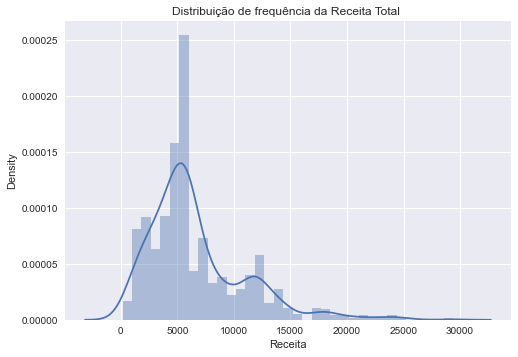

In [17]:
# Analisando a variável receita 
aux = sns.distplot( df['Receita'] )
aux.set_title("Distribuição de frequência da Receita Total ")

A variácel Receita apresenta uma distribuição assíncrona à direita, ou seja, a maior concentração dos dados encontram-se no ínicio do eixo x, porém alguns valores discrepantes deixam sua média viesada para direita de modo que a mediana é a posição central mais representativa. 

### Analisando o Lucro por ano e marca

O lucro é o responsável por financiar o desenvolvimento de uma empresa, sendo uma das sua razôes de ser. Nesse contexto, vamos analisar uma das variáveis mais importantes do nosso dataset.

##### Primeiro, vamos identificar sua distribuição de frequência para entender sua distribuição.

Text(0.5, 1.0, 'Distribuição de frequência da Receita Total ')

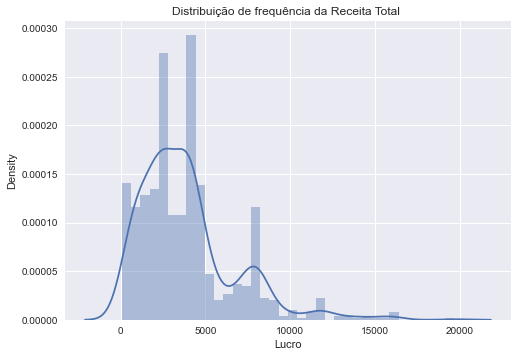

In [18]:
# Analisando a variável Lucro
aux = sns.distplot( df['Lucro'] )
aux.set_title("Distribuição de frequência da Receita Total ")

In [24]:
# Calculando o coefiênte de variância
cv = (df['Lucro'].std() / df['Lucro'].mean())*100
round(cv, 2)

72.98

A variável lucro apresentou o coeficiente de variância de 72,98%, ou seja, os valores do lucro apresentam uma grande variabilidade , variando quase 73% em torno de sua média que é 3.869,27. Além disso, a distribuição confirma essa variabilidade, devido ao fato da alta concentração de dados entre 0 e 5.000 dólares.  

In [25]:
# Lucros máximos e mínimos 
L_max  = df['Lucro'].max()
L_min =  df['Lucro'].min()

In [26]:
print("O maior lucro em uma venda foi de {} , por outro lado, o menor foi {}".format(L_max , L_min))

O maior lucro em uma venda foi de 19659.3 , por outro lado, o menor foi 78.4


In [29]:
# Agrupando por marcae data de venda
grupo_marca = df.groupby(['Marca' , df['Data Venda'].dt.year ]).agg({'Lucro': 'sum' })

In [30]:
grupo_marca.sort_values(by='Lucro' , ascending = False)
grupo_marca.reset_index( inplace = True );grupo_marca

,Marca,Data Venda,Lucro
0,Adventure Works,2008,"306,641.16"
1,Adventure Works,2009,"405,395.08"
2,Contoso,2008,"56,416.00"
3,Contoso,2009,"138,258.95"
4,Fabrikam,2008,"1,557,020.55"
5,Fabrikam,2009,"1,034,091.35"


Text(0.5, 1.0, 'Lucro x Marca')

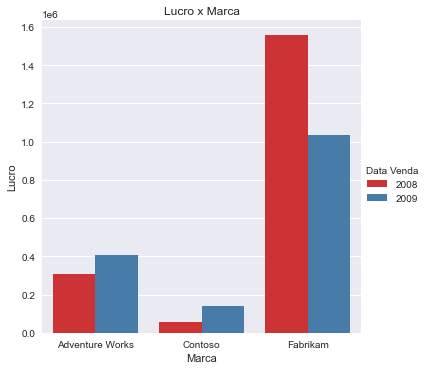

In [31]:
# Analisando  Lucro x Marca
aux = sns.catplot( data = grupo_marca , x = 'Marca' , y = 'Lucro' , kind = 'bar' , hue = 'Data Venda' , palette= 'Set1')
plt.title("Lucro x Marca")

In [32]:
grupo_marca = grupo_marca = df.groupby(['Marca']).agg({'Lucro': 'sum' , 'Receita': 'sum' ,'Despesas':'sum' })
grupo_marca.reset_index( inplace = True );

In [33]:
# Criando a coluna margem de lucro 
grupo_marca['Margem lucro'] = grupo_marca['Lucro'].div(grupo_marca['Receita'])*100
grupo_marca.sort_values(by = 'Margem lucro' , ascending= False)

,Marca,Lucro,Receita,Despesas,Margem lucro
2,Fabrikam,"2,591,111.90","4,077,606.47","1,486,494.57",63.54
0,Adventure Works,"712,036.24","1,456,603.12","744,566.88",48.88
1,Contoso,"194,674.95","450,396.55","255,721.60",43.22


Text(0.5, 1.0, ' Lucro x Ano')

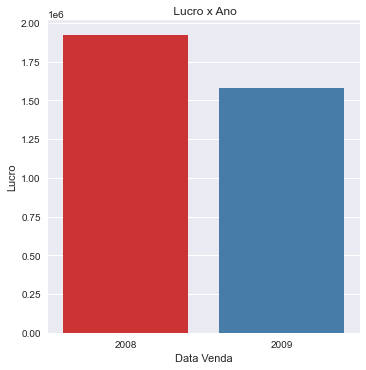

In [34]:
# Analisando o lucro por ano 
grupo_lucro = df.groupby([df['Data Venda'].dt.year ]).agg({'Lucro': 'sum' })
grupo_lucro.reset_index(inplace = True)
sns.catplot( data = grupo_lucro ,  y = 'Lucro' , kind = 'bar' , x = 'Data Venda' , palette= 'Set1' )
plt.title(" Lucro x Ano")

In [35]:
# Percentual do Lucro por marca
Lucro_total = grupo_marca['Lucro'].sum()
grupo_marca['Lucro %']  = (grupo_marca['Lucro'] /Lucro_total)*100;
grupo_marca.sort_values( by = 'Lucro %' , ascending=False  , inplace= True)

Text(0.5, 1.0, 'Percentual do Lucro total por marca')

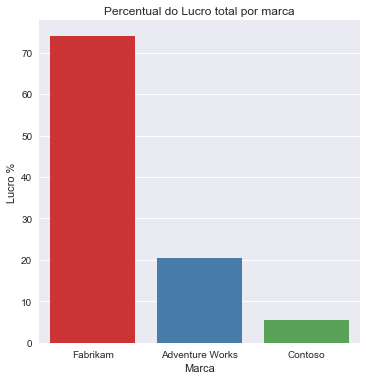

In [36]:
sns.catplot(y="Lucro %", x = 'Marca', kind='bar', palette="Set1", data=grupo_marca);
plt.title("Percentual do Lucro total por marca")

#### Insights - Lucro - Marca

Os produtos da marca Fabrikam foram os que apresentaram a maior rentabilidade, com uma margem de lucro de 63.54%; Além disso, sua perfomance de vendas representa mais de 70 % do lucro total da empresa, o que mostra o nível da sua representatividade no faturamento, porém vale a pena destacar que ,em relação ao ano de 2008, essa marca teve um decréscimo no seu faturamento. Indo de encontro a essa tendência, a marca Adventure Works aumentou seu faturamento no mesmo perído; entretanto esse cresimento não surtiu muito efeito , uma vez que o Lucro absoluto da empresa diminuiu, o qual mostra a importância dos produtos da Fabrikam para o rentabilidade da empresa. Por fim, a Contoso apresentou um baixo rendimento, apresentando a última posição tanto em rentabilidade, faturamento e lucro.

####  Analisando o tempo médio de envio de produtos

Para uma emrpesa de varejo, um dos seus diferenciais são os prazos de envio de seus produtos para o sistema de entrega, devido a isso, é preciso analisar se todos os produtos estão sendo enviados com celeridade e se algum tipo de produto apresenta uma baixa perfomance nesse quesito.

In [38]:
# Criando as colunas TEMPO DECORRIDO
df['Tempo decorrido'] = (df['Data Envio'] - df['Data Venda']).dt.days
df.head()

,Data Venda,Data Envio,No. Venda,Custo Unitário,Preço Unitário,Quantidade,Valor Desconto,Produto,Fabricante,Marca,Classe,Cor,Receita,Despesas,Lucro,Tempo decorrido
0,2008-05-09,2008-05-29,200805093CS607,348.58,758.00,6,0.00,Adventure Works Laptop15.4W M1548 Red,Adventure Works,Adventure Works,Regular,Red,"4,548.00","2,091.48","2,456.52",20
1,2008-05-12,2008-05-17,200805123CS567,348.58,758.00,6,0.00,Adventure Works Laptop15.4W M1548 Red,Adventure Works,Adventure Works,Regular,Red,"4,548.00","2,091.48","2,456.52",5
2,2008-05-14,2008-05-20,200805143CS576,348.58,758.00,6,0.00,Adventure Works Laptop15.4W M1548 Red,Adventure Works,Adventure Works,Regular,Red,"4,548.00","2,091.48","2,456.52",6
3,2008-05-21,2008-05-27,200805213CS576,348.58,758.00,6,0.00,Adventure Works Laptop15.4W M1548 Red,Adventure Works,Adventure Works,Regular,Red,"4,548.00","2,091.48","2,456.52",6
4,2008-06-20,2008-06-27,200806203CS586,348.58,758.00,6,0.00,Adventure Works Laptop15.4W M1548 Red,Adventure Works,Adventure Works,Regular,Red,"4,548.00","2,091.48","2,456.52",7


In [39]:
# Analisando as médias
df.groupby("Marca").agg({'Tempo decorrido': "mean" }).sort_values( by = "Tempo decorrido")


,Tempo decorrido
Marca,
Contoso,8.47
Fabrikam,8.51
Adventure Works,8.66


In [40]:
df["Tempo decorrido"].describe()

count                 904.00
mean                    8.54
std                     3.06
min                     4.00
25%                     6.00
50%                     9.00
75%                    11.00
max                    20.00
Name: Tempo decorrido, dtype: float64

Embora com uma baixa perfomance em termos de faturamento, a marca Contoso é a  que apresenta o menor tempo para o envio dos produtos entre as três marcas, porém a diferença entre elas são mínimas. Além disso é possível identificar que o tempo máximo foi de 20 dias, vamos investigar qual foi esse produto que demorou todo esse prazo.

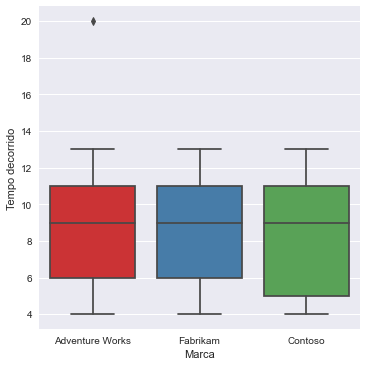

In [43]:
# Boxplot das três variáveis
tempo = df[['Tempo decorrido', 'Marca']]

sns.catplot(x="Marca", y="Tempo decorrido", kind="box", data=tempo , palette= 'Set1');

In [44]:
# Identificando o outlier
filtro = df['Tempo decorrido'] == 20
df[filtro]

,Data Venda,Data Envio,No. Venda,Custo Unitário,Preço Unitário,Quantidade,Valor Desconto,Produto,Fabricante,Marca,Classe,Cor,Receita,Despesas,Lucro,Tempo decorrido
0,2008-05-09,2008-05-29,200805093CS607,348.58,758.00,6,0.00,Adventure Works Laptop15.4W M1548 Red,Adventure Works,Adventure Works,Regular,Red,"4,548.00","2,091.48","2,456.52",20


O produto com 20 dias para o envio pertece ao Adventure Works, tal prazo excessivo indica algo fora da padrão da empresa, o que podemos considerar um outliers. Agora, vamos analisar se a média de envio deste fabricante é alterada sem este dado.

In [45]:
# Removendo outlier e calculando a média
df_1 = df[df['Tempo decorrido'] < 20]
df_1.groupby("Marca").agg({'Tempo decorrido': "mean" }).sort_values( by = "Tempo decorrido")

,Tempo decorrido
Marca,
Contoso,8.47
Fabrikam,8.51
Adventure Works,8.62


Conforme observado acima, a média da Adventure Works abaixou apenas 0.04 dias, ou seja, o efeito do outlier na média foi mínimo. 

### Analisando os produtos mais vendidos

Em relação a variável produtos, é necessário saber identificar os produtos mais vendidos, além de identificar sua representatividade para Lucro/Faturamento da empresa. 

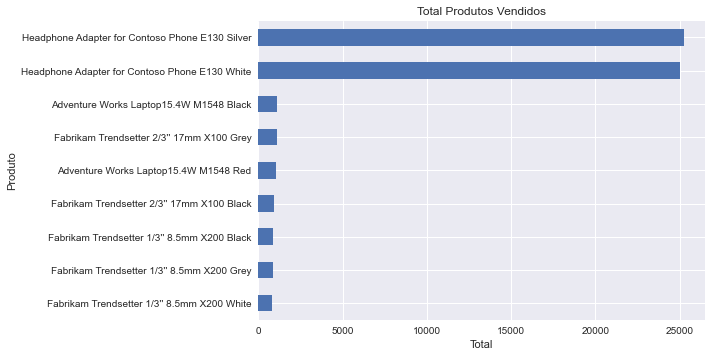

In [48]:
#Gráfico Total de produtos vendidos
df.groupby("Produto")["Quantidade"].sum().sort_values(ascending=True).plot.barh(title="Total Produtos Vendidos")
plt.xlabel("Total")
plt.ylabel("Produto");


Embora a marca Contoso apresente a menor Receita/Lucro agregado, seus produtos foram recorde de vendas ao longo dos anos , apresentando um desempenho bastante superior às outras marcas, em termos de quantidade. Mas então porque ela foi a que menos gerou receita? 

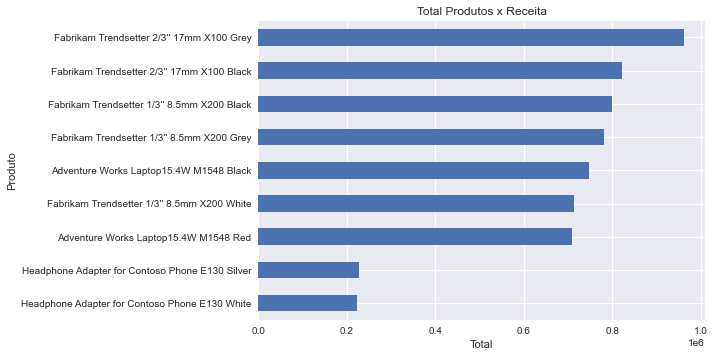

In [49]:
# Gráfocps 
df.groupby("Produto")["Receita"].sum().sort_values(ascending=True).plot.barh(title="Total Produtos x Receita")
plt.xlabel("Total")
plt.ylabel("Produto");

A resposta do questionamento a cima pode ser visualizado no grpafico anterior, pois embora a contoso apresente um grande volume de vendas, em termos de faturamento, ela não é tão perfomática em comparação com as demais. E como o esperado os produtos da marca Fabrikam apresentam o maior faturamento. 

#### Analisando a Receita e os Despesas  ao longo dos meses


In [58]:
# Criando as colunas ano e mes 
df['Mes'] = df['Data Venda'].dt.month
df['Ano'] = df['Data Venda'].dt.year

In [59]:
df_grupo = df.groupby(['Ano' , 'Mes'])[['Receita', 'Despesas']].sum();


In [60]:
df_ano_mes = df_grupo.reset_index( )

In [70]:
# Criando os filtros 
filtro = df_ano_mes['Ano'] == 2008
filtro2 = df_ano_mes['Ano'] == 2009


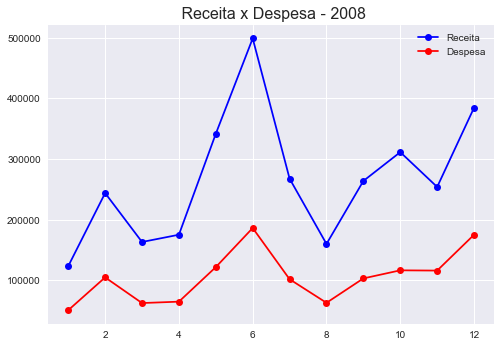

In [97]:
# Plotando o gráfico para o ano de 2008
plt.plot( df_ano_mes[filtro]['Mes'] , df_ano_mes[filtro]['Receita'] , marker = 'o' , c = 'b' , label = 'Receita')
plt.plot( df_ano_mes[filtro]['Mes'] , df_ano_mes[filtro]['Despesas'] , marker = 'o' , c = 'r' , label = 'Despesa' )
plt.title(" Receita x Despesa - 2008" , fontsize = 16)
plt.legend( fontsize = 10)
plt.show()

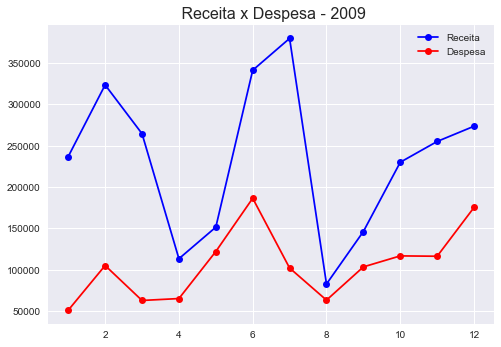

In [99]:
# Plotando o gráfico para o ano de 2008
plt.plot( df_ano_mes[filtro2]['Mes'] , df_ano_mes[filtro2]['Receita'] , marker = 'o' , c = 'b' , label = 'Receita')
plt.plot( df_ano_mes[filtro2]['Mes'] , df_ano_mes[filtro]['Despesas'] , marker = 'o' , c = 'r' , label = 'Despesa' )
plt.title(" Receita x Despesa - 2009" , fontsize = 16)
plt.legend( fontsize = 10)
plt.show()

É possível identificar que o período de receita apresentou o pico , em ambos os anos, no mês de junho, porém no ano de 2009 esse pico de receita foi menor; além disso, teve uma queda abrupta na receita nos meses subsequentes ( seria necessário um estudo complementar para entender o motivo dessa queda, se foi devido a uma crise na empresa, fechamento ou etc.), enquanto a isso em 2008 também teve essa baixa, porém ela foi moderada.